## 28Aug2019 - Brownbag 
 
- Load up your packages   
- Import our data   
- Get a Feel for your Data  
- Determine Numeric / Categorical Features  
- Fit Models  
- Evaluate Models  

In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% }</style>"))

# --- standard stuff 
import os
import csv
import boto3
import numpy as np
import pandas as pd

# --- sklearn RF, GBM, ET classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier        #- create a decison tree 
# --- sklearn train test split 
from sklearn.model_selection import train_test_split

# --- sklearn metrics for model evaluation 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, accuracy_score

# --- sklearn pipeline stuff 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# ------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = [10, 10]
%matplotlib inline
pd.set_option('display.max_columns', 200)         
pd.set_option('display.max_rows', 100)            
pd.options.display.float_format = '{:.3f}'.format

# Import Data Sets 

Our data consists of 8k "training" observations, and 2k "test" observations 

you can find the data here:  
'https://github.com/GeorgeHayduke/HNBrownBag/blob/master/fraud_data_training.csv?raw=true'
'https://github.com/GeorgeHayduke/HNBrownBag/blob/master/fraud_data_predict.csv?raw=true'



In [52]:
train = pd.read_csv('https://github.com/GeorgeHayduke/HNBrownBag/blob/master/fraud_data_training.csv?raw=true')
test  = pd.read_csv('https://github.com/GeorgeHayduke/HNBrownBag/blob/master/fraud_data_predict.csv?raw=true')
print("Train : " + str(train.shape[0]))
print("Test  : " + str(test.shape[0]))

Train : 16000
Test  : 4000


### Eyeball the data, does it look right? 

In [53]:
train.head()

,event_timestamp,email_address,ip_address,useragent,device_fingerprint,payment_instrutment,card_bin,avs_code,payment_auth_code,phone_number,billing_name,billing_phone_number,billing_address_country,billing_address_region,billing_address_city,billing_address_line_1,billing_address_line_2,billing_address_zip,shipping_name,shipping_phone_number,shipping_address_country,shipping_address_region,shipping_address_city,shipping_address_line_1,shipping_address_line_2,shipping_address_zip,transaction_id,order_item_ids,order_item_names,order_item_categories,order_currency,is_fraud,order_price
0,2018-12-02 13:41:13,keith61@hotmail.com,107.77.226.151,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,nan,CC,458774,N,nan,(029)724-4719x466,Ricky Davis,(227)911-6687x1373,US,CA,RIVERSIDE,86037 Sarah Mall,nan,92507,Ricky Davis,(227)911-6687x1373,US,CA,RIVERSIDE,86037 Sarah Mall,nan,92507,22-2077257,nan,nan,nan,USD,1,-58.720
1,2018-09-05 14:20:11,delgadoebony@gmail.com,206.53.226.251,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:21...,nan,CC,403655,X,nan,101.837.4460,Erin Delacruz,+1-437-685-3446x33335,US,NE,TILDEN,413 Ramirez Unions Apt. 617,nan,68781,Erin Delacruz,+1-437-685-3446x33335,US,NE,TILDEN,413 Ramirez Unions Apt. 617,nan,68781,53-5217686,nan,nan,nan,USD,0,-525.940
2,2019-02-12 01:38:48,nbrown@hotmail.com,107.77.205.234,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3)...,nan,CC,440531,B,nan,(362)047-6223,Natalie Holland,009.692.0529,US,IA,DELHI,34912 Melissa Row Suite 779,nan,52223,Natalie Holland,009.692.0529,US,IA,DELHI,34912 Melissa Row Suite 779,nan,52223,10-3030623,nan,nan,nan,USD,0,-65.100
3,2019-03-06 21:20:23,bretthoward@gmail.com,192.55.54.38,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3...,nan,CC,549623,W,nan,7113956888,Cynthia Montes,795-361-0030,US,FL,OCALA,67643 Jordan Burg Apt. 255,nan,34472,Cynthia Montes,795-361-0030,US,FL,OCALA,67643 Jordan Burg Apt. 255,nan,34472,27-4784975,nan,nan,nan,USD,0,693.480
4,2018-10-08 04:38:19,ibradshaw@hotmail.com,3.95.70.115,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,nan,CC,425008,T,nan,921-423-9896,Christopher Jones,+1-827-453-8700x3665,US,KS,MAYFIELD,1972 Karen Pines Apt. 026,nan,67103,Christopher Jones,+1-827-453-8700x3665,US,KS,MAYFIELD,1972 Karen Pines Apt. 026,nan,67103,35-0829606,nan,nan,nan,USD,1,-47.180


# what are the data types?

In [54]:
train.dtypes

event_timestamp              object
email_address                object
ip_address                   object
useragent                    object
device_fingerprint          float64
payment_instrutment          object
card_bin                      int64
avs_code                     object
payment_auth_code           float64
phone_number                 object
billing_name                 object
billing_phone_number         object
billing_address_country      object
billing_address_region       object
billing_address_city         object
billing_address_line_1       object
billing_address_line_2      float64
billing_address_zip           int64
shipping_name                object
shipping_phone_number        object
shipping_address_country     object
shipping_address_region      object
shipping_address_city        object
shipping_address_line_1      object
shipping_address_line_2     float64
shipping_address_zip          int64
transaction_id               object
order_item_ids              

### Step 1. what are we dealing with? 

Text(0, 0.5, 'Number of Observations')

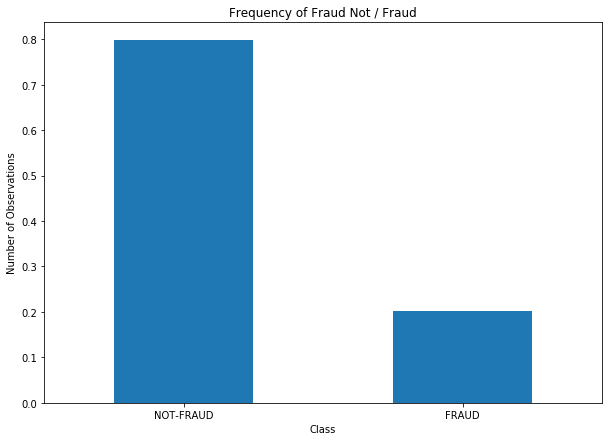

In [56]:
LABELS = ['NOT-FRAUD', 'FRAUD']
count_classes = pd.value_counts(train['is_fraud'], normalize=True, sort = True)
plt.figure(figsize=(10,7))
count_classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), LABELS)
plt.title("Frequency of Fraud Not / Fraud")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

### Step 2. Summary Statisitcs 

In [57]:
def summary_stats(df):
    """ Generate summary statsitics for a panda's data frame 
        
        Args:
            df (DataFrame): panda's dataframe to create summary statisitcs for.
    
        Returns:
            DataFrame of summary statistics 
        
        Example:
            df_summary = summary_stats(df)
        
    """
    rowcnt = len(df)
    df_s1  = df.agg(['count', 'nunique', 'min', 'max']).transpose().reset_index().rename(columns={"index":"_column"})
    df_s1["null"] = (rowcnt - df_s1["count"]).astype('int64')
    df_s1["not_null"] = rowcnt - df_s1["null"]
    df_s1["null_pct"] = df_s1["null"] / rowcnt
    df_s1["nunique_pct"] = df_s1['nunique']/ rowcnt
    dt = pd.DataFrame(df.dtypes).reset_index().rename(columns={"index":"_column", 0:"_dtype"})
    df_stats = pd.merge(dt, df_s1, on='_column', how='inner').round(4)
    df_stats['nunique'] = df_stats['nunique'].astype('int64')
    df_stats['count'] = df_stats['count'].astype('int64')
    
    return df_stats

In [58]:
df_summary = summary_stats(train)
df_summary

,_column,_dtype,count,nunique,min,max,null,not_null,null_pct,nunique_pct
0,event_timestamp,object,16000,15997,2018-08-27 11:54:36,2019-08-27 16:58:53,0,16000,0.000,1.000
1,email_address,object,16000,15482,aacosta@hotmail.com,zyoung@gmail.com,0,16000,0.000,0.968
2,ip_address,object,16000,744,104.129.198.54,96.57.92.110,0,16000,0.000,0.046
3,useragent,object,16000,249,Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1),Opera/9.80 (X11; Linux x86_64; U; pl) Presto/2...,0,16000,0.000,0.016
4,device_fingerprint,float64,0,0,NaN,NaN,16000,0,1.000,0.000
5,payment_instrutment,object,16000,1,CC,CC,0,16000,0.000,0.000
6,card_bin,int64,16000,2304,347067,673577,0,16000,0.000,0.144
7,avs_code,object,16000,18,A,Z,0,16000,0.000,0.001
8,payment_auth_code,float64,0,0,NaN,NaN,16000,0,1.000,0.000
9,phone_number,object,16000,16000,(000)413-7393,999.874.3105x344,0,16000,0.000,1.000


### Step 3. figure out what to filter  

In [59]:
df_summary.query('null_pct > 0.5')

,_column,_dtype,count,nunique,min,max,null,not_null,null_pct,nunique_pct
4,device_fingerprint,float64,0,0,NaN,NaN,16000,0,1.000,0.000
8,payment_auth_code,float64,0,0,NaN,NaN,16000,0,1.000,0.000
16,billing_address_line_2,float64,0,0,NaN,NaN,16000,0,1.000,0.000
24,shipping_address_line_2,float64,0,0,NaN,NaN,16000,0,1.000,0.000
27,order_item_ids,float64,0,0,NaN,NaN,16000,0,1.000,0.000
28,order_item_names,float64,0,0,NaN,NaN,16000,0,1.000,0.000
29,order_item_categories,float64,0,0,NaN,NaN,16000,0,1.000,0.000


In [60]:
df_summary.query('nunique_pct == 1')

,_column,_dtype,count,nunique,min,max,null,not_null,null_pct,nunique_pct
9,phone_number,object,16000,16000,(000)413-7393,999.874.3105x344,0,16000,0.000,1.000
11,billing_phone_number,object,16000,16000,(000)276-4999x817,9996175448,0,16000,0.000,1.000
15,billing_address_line_1,object,16000,16000,000 Cox Overpass Suite 850,99965 Jeffery Camp,0,16000,0.000,1.000
19,shipping_phone_number,object,16000,16000,(000)276-4999x817,9996175448,0,16000,0.000,1.000
23,shipping_address_line_1,object,16000,16000,000 Cox Overpass Suite 850,99965 Jeffery Camp,0,16000,0.000,1.000
26,transaction_id,object,16000,16000,01-0088105,99-9994657,0,16000,0.000,1.000


### Step 4. Numeric features 
- Are often are categorical 
- define numeric features 


In [61]:
df_summary[((df_summary["_dtype"] == 'float64') | (df_summary["_dtype"] == 'int64')) & 
           (df_summary["null_pct"] < 1 ) ] 

,_column,_dtype,count,nunique,min,max,null,not_null,null_pct,nunique_pct
6,card_bin,int64,16000,2304,347067,673577,0,16000,0.000,0.144
17,billing_address_zip,int64,16000,10931,705,99928,0,16000,0.000,0.683
25,shipping_address_zip,int64,16000,10931,705,99928,0,16000,0.000,0.683
31,is_fraud,int64,16000,2,0,1,0,16000,0.000,0.000
32,order_price,float64,16000,15682,-3475.080,3665.980,0,16000,0.000,0.980


In [62]:
numeric_features = ['order_price']

In [63]:
df_summary[(df_summary["_dtype"] == 'object') & 
           (df_summary["null_pct"] < 1) & 
           (df_summary["nunique_pct"] < 0.99) &
           (df_summary["nunique"] > 1 )] 

,_column,_dtype,count,nunique,min,max,null,not_null,null_pct,nunique_pct
1,email_address,object,16000,15482,aacosta@hotmail.com,zyoung@gmail.com,0,16000,0.000,0.968
2,ip_address,object,16000,744,104.129.198.54,96.57.92.110,0,16000,0.000,0.046
3,useragent,object,16000,249,Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1),Opera/9.80 (X11; Linux x86_64; U; pl) Presto/2...,0,16000,0.000,0.016
7,avs_code,object,16000,18,A,Z,0,16000,0.000,0.001
10,billing_name,object,16000,14574,Aaron Acosta,Zoe Sanchez,0,16000,0.000,0.911
13,billing_address_region,object,16000,54,AK,WY,0,16000,0.000,0.003
14,billing_address_city,object,16000,6520,ABBEVILLE,ZURICH,0,16000,0.000,0.407
18,shipping_name,object,16000,14574,Aaron Acosta,Zoe Sanchez,0,16000,0.000,0.911
21,shipping_address_region,object,16000,54,AK,WY,0,16000,0.000,0.003
22,shipping_address_city,object,16000,6520,ABBEVILLE,ZURICH,0,16000,0.000,0.407


### Step 5. Categorical features 

In [64]:
categorical_features = df_summary[(df_summary["_dtype"] == 'object') & 
           (df_summary["null_pct"] < 1) & 
           (df_summary["nunique_pct"] < 0.99) &
           (df_summary["nunique"] > 1 )]["_column"].tolist() + ['billing_address_zip', 'shipping_address_zip', 'card_bin']

categorical_features

['email_address',
 'ip_address',
 'useragent',
 'avs_code',
 'billing_name',
 'billing_address_region',
 'billing_address_city',
 'shipping_name',
 'shipping_address_region',
 'shipping_address_city',
 'billing_address_zip',
 'shipping_address_zip',
 'card_bin']

## Step 6. Partition our Training data into X_train and X_eval
- we'd normally tune our hyper parameters to the Eval data  


In [65]:
X_train = train[numeric_features + categorical_features]
y_train = train['is_fraud'].values
X_test = test[numeric_features + categorical_features]
y_test = test['is_fraud'].values

print("X_train rows: " + str(X_train.shape[0]))
print("X_test  rows: " + str(X_test.shape[0]))

X_train rows: 16000
X_test  rows: 4000


## -------------------------------------
### Step 7. Lets Start Building our Pipeline 

1. numeric transformers 
2. categorical transfomers 
3. column transfomer - allows different columns or subsets to be transformed separatey then brought back together into a single X matrix 
4. pipeline combines the preprocessors (transformers) and the model estimator  

simply **"fit"** the pipeline  

In [72]:
 # --- numeric transformer --- 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- categorical variable trsnsformer --- 
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# --- pull them together into a preprocessor --- 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features )
        ])

# ---  build 4 pipelines   --- 
model_dt = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(max_depth=20))])

model_rf = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators = 100, 
                                                                       n_jobs=-1))])
model_gb = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('classifier', GradientBoostingClassifier(n_estimators = 50, learning_rate=0.05, max_depth=4
                                                                      ))])
model_et = Pipeline(steps=[ ('preprocessor', preprocessor),
                            ('classifier', ExtraTreesClassifier(n_estimators = 50, 
                                                                       n_jobs=-1))])

### Steps 8. fit your models
of course you could do this in a loop too  


In [73]:
model_dt.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [75]:
model_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [76]:
model_gb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [77]:
model_et.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

### Step 9. Evaluate Models 

In [78]:
model_list = [model_dt, model_rf, model_gb, model_et]

model_dict = {
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting Machine" : model_gb,
    "Extra Random Trees"  : model_et
}

for m in model_dict.keys():
    model = model_dict[m]
    # --- model predict train  --- 
    pred_train = model.predict(X_train)
    prob_train = model.predict_proba(X_train)[:,1]
    acc_train = accuracy_score(y_train, pred_train)
    auc_train = roc_auc_score(y_train, prob_train)


    # --- model predict test  --- 
    pred_test = model.predict(X_test)
    prob_test = model.predict_proba(X_test)[:,1]
    acc_test = accuracy_score(y_test, pred_test)
    auc_test = roc_auc_score(y_test, prob_test)

    # --- model report --- 
    print ("Model Report " + m)
    print ("------------------------------------------------")
    print ("(Train)")
    print ("Accuracy         : %.4g" % accuracy_score(y_train, pred_train))
    print ("(Test)")
    print ("Accuracy         : %.4g" % accuracy_score(y_test, pred_test))
    print ("\n")
    print (pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print ("\n")

Model Report Decision Tree
------------------------------------------------
(Train)
Accuracy         : 0.9343
(Test)
Accuracy         : 0.876


Predicted     0    1   All
Actual                    
0          3032  174  3206
1           322  472   794
All        3354  646  4000


Model Report Random Forest
------------------------------------------------
(Train)
Accuracy         : 0.9999
(Test)
Accuracy         : 0.8185


Predicted     0    1   All
Actual                    
0          3190   16  3206
1           710   84   794
All        3900  100  4000


Model Report Gradient Boosting Machine
------------------------------------------------
(Train)
Accuracy         : 0.8442
(Test)
Accuracy         : 0.8482


Predicted     0    1   All
Actual                    
0          3156   50  3206
1           557  237   794
All        3713  287  4000


Model Report Extra Random Trees
------------------------------------------------
(Train)
Accuracy         : 1
(Test)
Accuracy         : 0.8145
